In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Q1.

Mixed frequencies are : [149.90006662225184, 369.7534976682212]


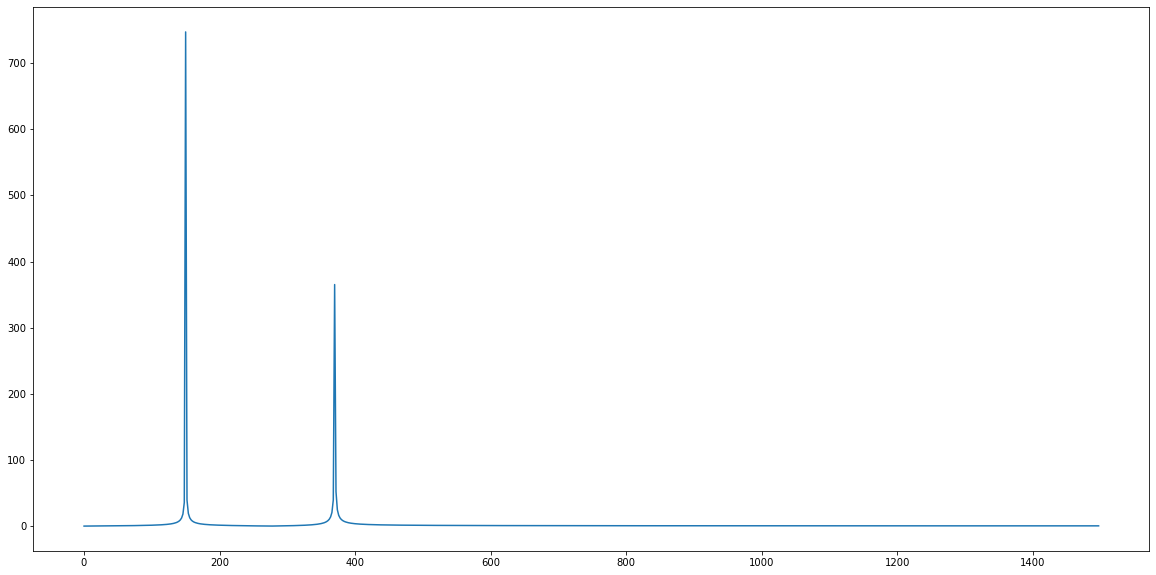

In [2]:
data = io.loadmat("/Users/kunwoosmac/Downloads/data(3).mat")
s = data['s'][0]
Fs = 3000 # Hz
dt = 1 / Fs


s_fft = abs(np.fft.fft(s))
fk = [Fs * k / len(s) for k in range(len(s))]

# Only half is useful
s_fft = s_fft[:int(len(s_fft)/2)]
fk = fk[:int(len(fk)/2)]

peak = []

for val in s_fft:
    if val > 300:
        peak.append(fk[np.where(s_fft == val)[0][0]])

print("Mixed frequencies are :", peak)
plt.figure(figsize = (20,10))
plt.plot(fk, s_fft)

# Q2.

- The second order ODE can be written as systems of first order ODE.
- Introducing new varibale w
- dx/dt = w
- dw/dt = (-c/m) * w + (-k/m) * x

In [3]:
def osc(y, t):
    m = 1
    c = 0.1
    k = 2
    
    x, omega = y
    dydt = [omega, (-c/m)*omega + (-k/m)*x]
    return dydt


x when t = 20 : -0.03657527594344623


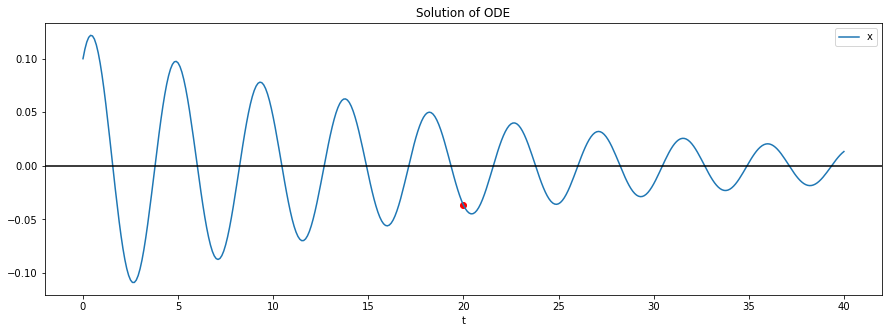

In [4]:
t = np.linspace(0,40, 401)

print()

y0 = [0.1, 0.1]
sol = odeint(osc, y0, t)

x20 = sol[:, 0][np.where(t==20)][0]

print("x when t = 20 :", x20)

plt.figure(figsize = (15, 5))
plt.title("Solution of ODE")
plt.plot(t, sol[:, 0], label='x')
plt.legend(loc='best')
plt.xlabel('t')
plt.axhline(0, c = 'black')
plt.scatter(20, x20, c = 'r')
plt.show()

# Q3.

In [5]:
A = np.array([1,1,-2])
B = np.array([2,-3,1])

theta = np.arccos(np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))
print("rad:", theta, "degree", theta*180/np.pi)

rad: 1.9042694990467286 degree 109.10660535086909


# Q4.

In [6]:
A = np.zeros((3,4))
B = np.zeros((4,1))
print((A@B).shape)

(3, 1)


# Q5.

In [7]:
stress = (np.array([20,20,-18,20,28,12,-18,12,8])).reshape(3,3)

eigval, _ = np.linalg.eig(stress)

eigval = list(eigval)
for i in range(3):
    print("eigen value(principal stress): {}".format(eigval[i]))

eigen value(principal stress): -15.87188739276096
eigen value(principal stress): 44.57594056827401
eigen value(principal stress): 27.29594682448689


# Q6.

In [8]:
def eq(x): 
    return np.exp(x) - 1

guess_list = list(range(100))
# # guess_list = [10]
# guess_list = [10,9,8,7,6,5,4,3,2,1, -1, -10]
answers = []
for guess in guess_list:
    x = fsolve(eq, guess)
    answers.append(x[0].round(5))
    del x
    
answers = set(answers)
print("Number of Zeros :", len(answers))

Number of Zeros : 1
